In [2]:


#Path to top-level do-dem directory - edit for your system.
path_to_dodem = '/Users/jmdunca2/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')

#do-dem
import lightcurves as lc
import region_fitting as rf
import nustar_dem_prep as nu
import dodem

#Basics
import numpy as np
import importlib
import matplotlib.pyplot as plt
from astropy import units as u

#Time
import matplotlib.dates as mdates
import astropy.time
import datetime

#File wrangling
import glob
import pickle
import os
import pathlib
os.getcwd()

'/Users/jmdunca2/do-dem'

In [3]:
datapaths = ['/Users/jmdunca2/nustar/jan-2020/20513006001/',
                       '/Users/jmdunca2/nustar/jan-2020/20513007001/',
                       '/Users/jmdunca2/nustar/jan-2020/20513008001/',
             '/Users/jmdunca2/nustar/jan-2020/20515017001/',
                       '/Users/jmdunca2/nustar/jan-2020/20515018001/',
                       '/Users/jmdunca2/nustar/jan-2020/20515021001/']
obsids = ['20513006001',
                     '20513007001', '20513008001','20515017001', '20515018001', '20515021001']

working_dir= '/Users/jmdunca2/do-dem/initial_dem_29-jan20/'

Using time limits:
[datetime.datetime(2020, 1, 30, 17, 50, 16, 183999, tzinfo=datetime.timezone.utc), datetime.datetime(2020, 1, 30, 18, 50, 51, 184000, tzinfo=datetime.timezone.utc)]


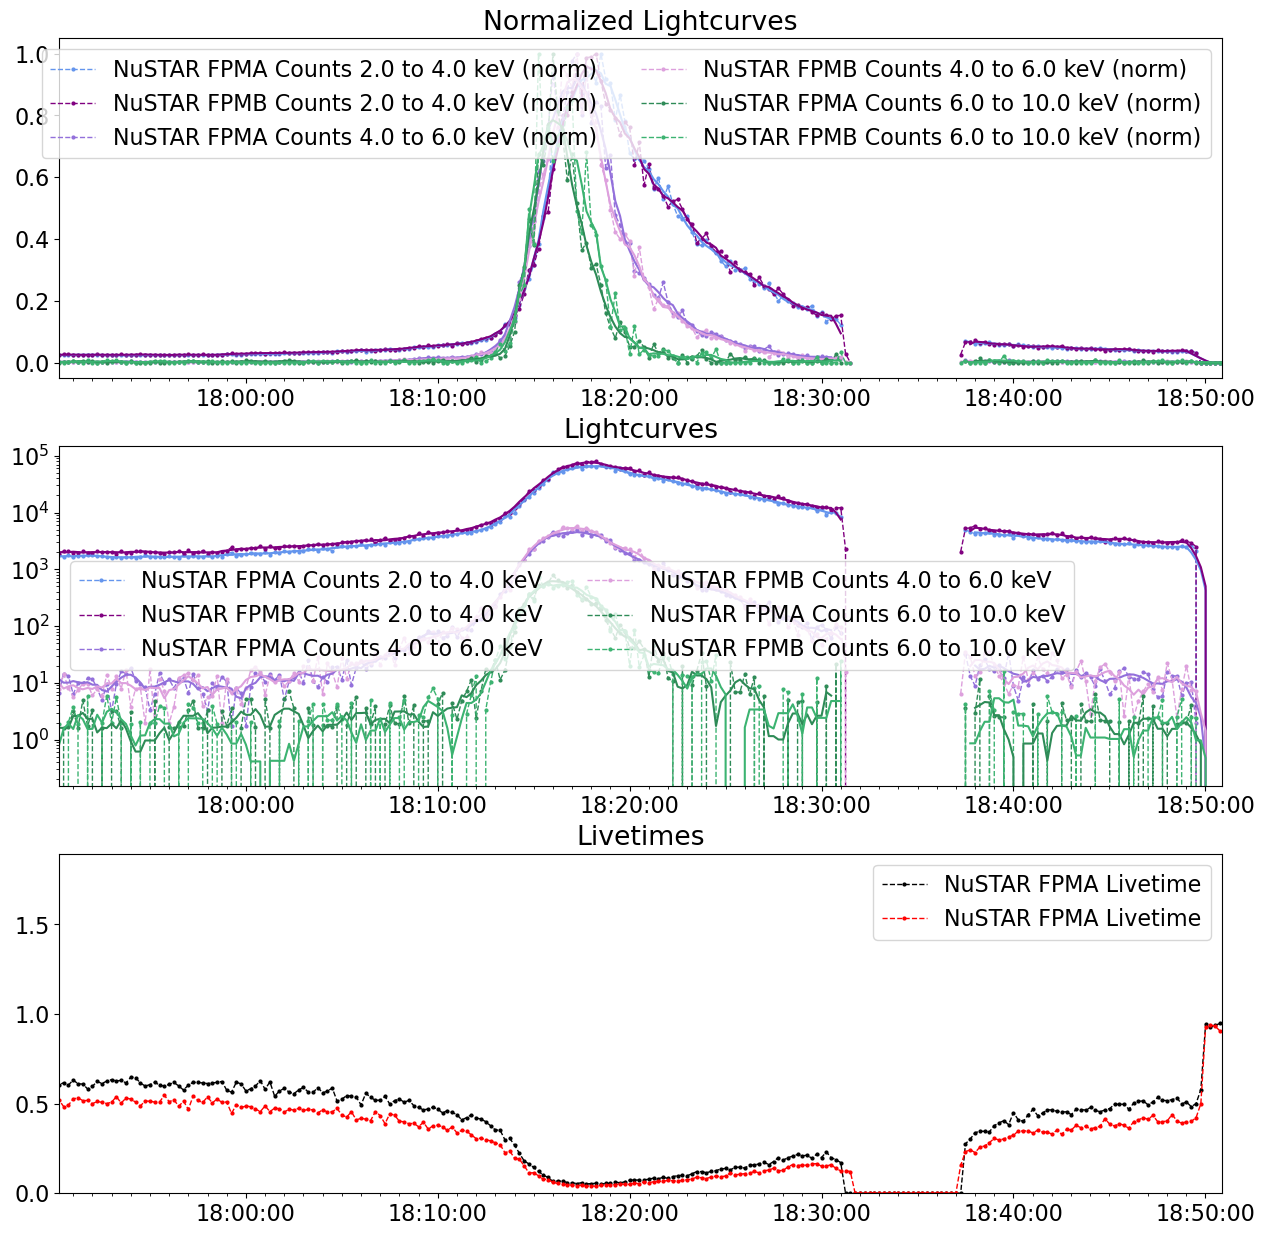

In [12]:


#Make a new working directory for prepped data/etc if it doesn't yet exist
save_path = pathlib.Path(working_dir)
if not save_path.exists():
    save_path.mkdir()

ind=5

#Set path to obsid directory - initial pipeline should have been run already.
datapath=datapaths[ind]
obsid=obsids[ind]

#Comment second line if you're not using this same example nustar orbit
#Edit it to include only the desired time interval (default- all times in file) once you've run this once
timerange=[]
#timerange=[datetime.datetime(2018, 5, 29, 22, 22), datetime.datetime(2018, 5, 29, 23, 20)]

import initial_analysis as ia
import nustar_utilities as nuutil

fpm='A'
#Get first and last times associated with an event in the cleaned event file.
evt_data, hdr = ia.return_submap(datapath=datapath, fpm=fpm, return_evt_hdr=True)
time0, time1 = [nuutil.convert_nustar_time(hdr['TSTART']), nuutil.convert_nustar_time(hdr['TSTOP'])]

time0_ = time0.tt.datetime
time1_ = time1.tt.datetime

#print(time0, time1)

timerange = [time0_,time1_]
from datetime import timezone
timerange = [t.replace(tzinfo=timezone.utc) for t in timerange]

evtA = glob.glob(datapath+'/event_cl/*A06_cl.evt')
evtB = glob.glob(datapath+'/event_cl/*B06_cl.evt')
hkA  = glob.glob(datapath+'/hk/*A_fpm.hk')
hkB  = glob.glob(datapath+'/hk/*B_fpm.hk')

importlib.reload(lc)
lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[2.,4.], 
                              livetime_corr=True, save_dir=working_dir)
lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[4.,6.], 
                              livetime_corr=True, save_dir=working_dir)
lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[6.,10.], 
                              livetime_corr=True, save_dir=working_dir)

lc.plot_nustar_lightcurves(eranges = [[2.,4.],[4.,6.],[6.,10.]],
                           timerange=timerange, save_dir=working_dir)